In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# PAIS

In [7]:
df_world = pd.read_csv("owid-covid-data.csv", parse_dates=["date"], index_col="date")
df_mob = pd.read_csv("Global_Mobility_Report.csv", parse_dates=['date'], index_col='date')


In [8]:
def get_merged_data(country):
    df_covid = df_world[df_world['location'] == country]
    df_m = df_mob[df_mob['country_region']==country]
    df_m = df_m[df_m['sub_region_1'].isna()]
    df_m = df_m[df_m['sub_region_2'].isna()]


    df_merged = df_covid.merge(df_m, left_index=True, right_index=True)

    df_merged['pct_new_cases'] = df_merged['new_cases'].pct_change()


In [9]:
df_br = get_merged_data("Brazil")

In [12]:
df_br['pct_new_cases'] = df_br['new_cases'].pct_change()

In [13]:
df_br[['new_cases','pct_new_cases']]

,new_cases,pct_new_cases
date,,
2020-02-15,0,NaN
2020-02-16,0,NaN
2020-02-17,0,NaN
2020-02-18,0,NaN
2020-02-19,0,NaN
...,...,...
2020-05-21,19951,0.146082
2020-05-22,18508,-0.072327
2020-05-23,20803,0.124000


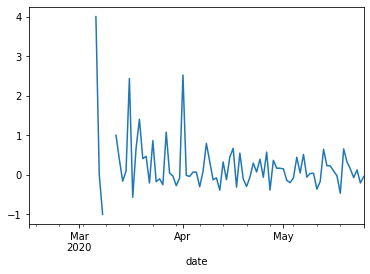

In [10]:
df_br['new_cases'].pct_change().plot()

In [53]:
def plot_2_vars(country,var1,var2):

    df_covid = df_world[df_world['location'] == country]
    df_m = df_mob[df_mob['country_region']==country]
    df_m = df_m[df_m['sub_region_1'].isna()]
    df_m = df_m[df_m['sub_region_2'].isna()]


    df_merged = df_covid.merge(df_m, left_index=True, right_index=True)

    fig, ax1 = plt.subplots(figsize=(12,7))

    color = 'tab:red'
    df_merged[var1].plot(ax=ax1, color=color, label=var1)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend()

    ax2 = ax1.twinx()

    color = 'tab:blue'
    df_merged[var2].plot(ax=ax2, color=color, label=var2)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    ax2.legend()

    plt.title(country)
    plt.show()

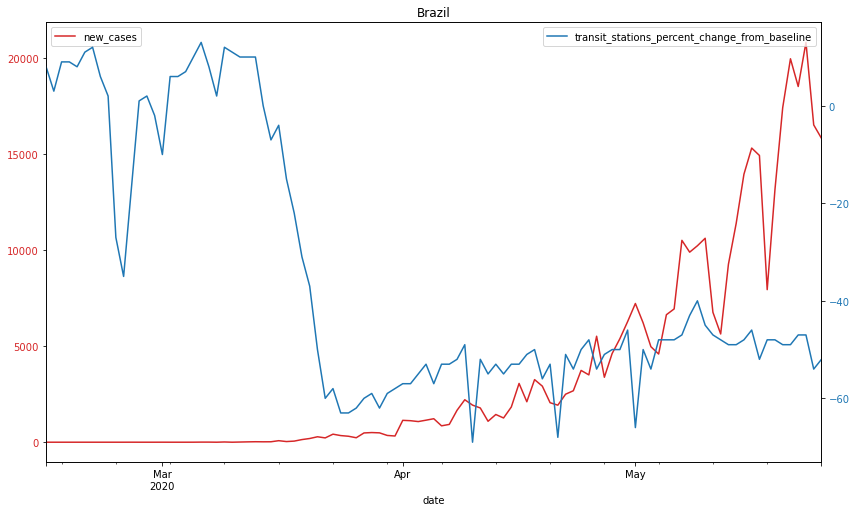

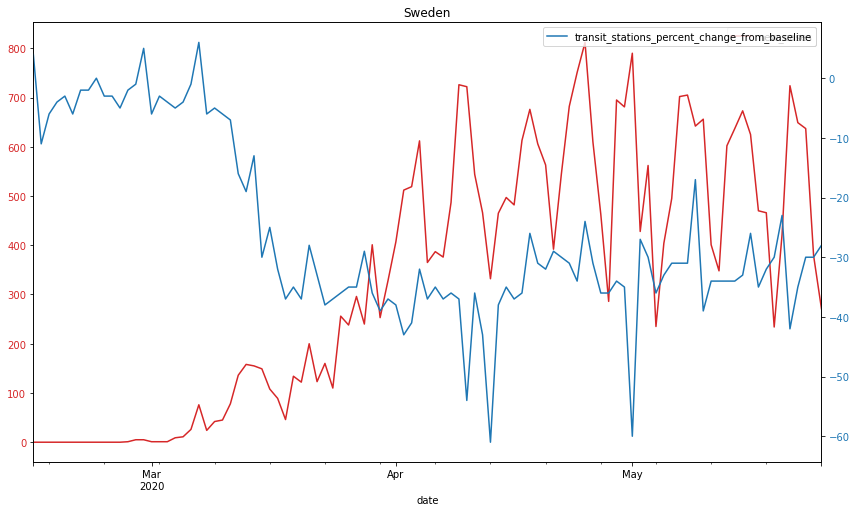

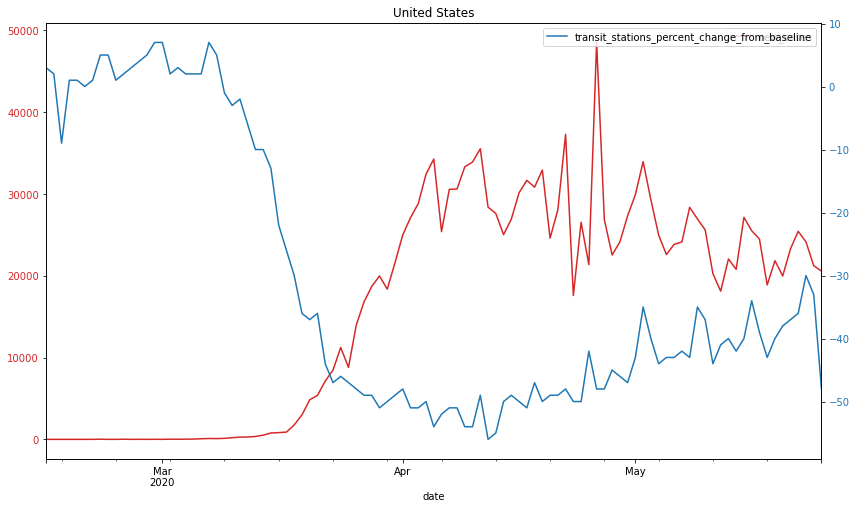

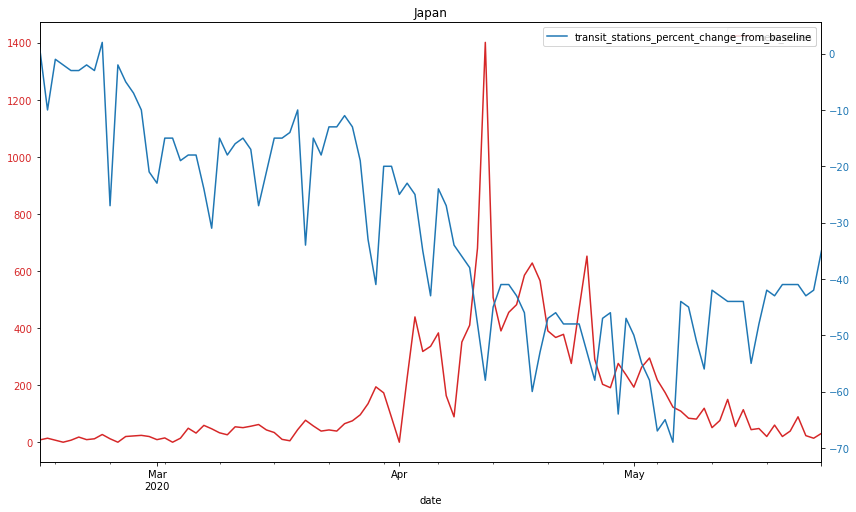

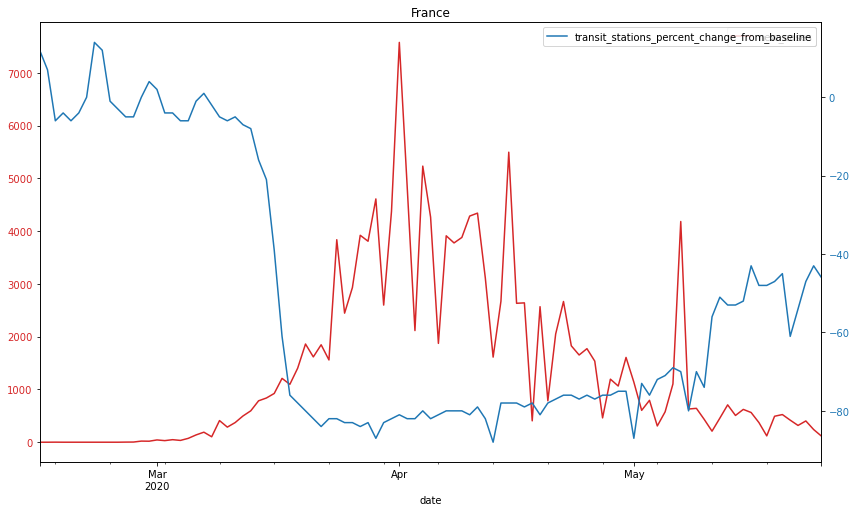

In [57]:
for country in ['Brazil', 'Sweden', 'United States', 'Japan','France']:
    plot_2_vars(country,'new_cases','transit_stations_percent_change_from_baseline')